In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
import seaborn as sns
import csv
from scipy import stats, integrate
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

moviedata = pd.read_csv("movies_data.csv")
csv = os.path.join('santhosh.csv')
movie_df = pd.read_csv(csv,encoding='latin-1')

In [2]:
movie_df = movie_df[movie_df.Budget!=0]
movie_df = movie_df[movie_df.Revenue!=0]
movie_df.dropna(subset=['Overview'])
movie_df.head()

,Title,Movie ID,Genre,Production Company,Budget,Revenue,Overview,Release Date
0,Pirates of the Caribbean: At World's End,285.0,Adventure,Jerry Bruckheimer Films,300000000.0,961000000.0,"Captain Barbossa, long believed to be dead, ha...",2007-05-19
1,Harry Potter and the Order of the Phoenix,675.0,Adventure,Warner Bros. Pictures,150000000.0,938212738.0,Returning for his fifth year of study at Hogwa...,2007-06-28
2,Spider-Man 3,559.0,Fantasy,Marvel Enterprises,258000000.0,890871626.0,The seemingly invincible Spider-Man goes up ag...,2007-05-01
5,Live Free or Die Hard,1571.0,Action,Dune Entertainment,110000000.0,383531464.0,"John McClane is back and badder than ever, and...",2007-06-20
6,Zodiac,1949.0,Crime,Paramount,65000000.0,84785914.0,"The true story of the investigation of the ""Zo...",2007-03-02


In [3]:
movie_df = movie_df.dropna(subset = ['Overview'])
compound_list = []
for overview in movie_df['Overview']:
    compound = analyzer.polarity_scores(overview)["compound"]
    compound_list.append(compound)
movie_df['Sentiment Score']=compound_list


In [4]:
movie_df['ROI']=(movie_df['Revenue']-movie_df['Budget'])/movie_df['Budget']
movie_df_adj = movie_df[movie_df.ROI<20]


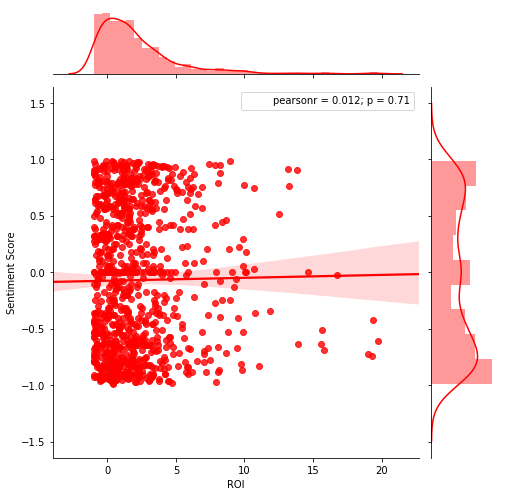

In [5]:

g = sns.jointplot("ROI", "Sentiment Score", data=movie_df_adj, kind="reg", color="r", size=7)

In [6]:
movie_df_mean=movie_df.groupby(['Production Company']).mean()
movie_df_mean=movie_df_mean.sort_values(['ROI'],ascending = False)
movie_df_mean=movie_df_mean[movie_df_mean.ROI <70]
movie_df_mean = movie_df_mean.reset_index()
movie_df_mean.head()

,Production Company,Movie ID,Budget,Revenue,Sentiment Score,ROI
0,Room 101,79738.5,3000000.0,122288241.0,-0.4310,64.161044
1,Monkeypaw Productions,419430.0,4500000.0,255017329.0,-0.4678,55.670518
2,Stage 6 Films,35919.5,4750000.0,53819235.5,-0.2205,32.000716
3,Ada Films,84355.0,125000.0,3200000.0,-0.1779,24.600000
4,Vesuvius Productions,440021.0,4800000.0,117883845.0,-0.6908,23.559134


Text(0.5,1,'Top 10 Production Company with Leading Average ROI')

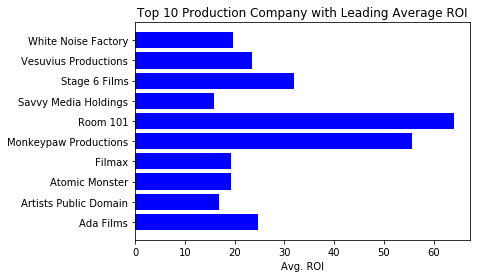

In [7]:
#Plot bargraph using the top 10 production company (measuring efficiency of each production company)
x_axis = movie_df_mean['Production Company'][0:10]
y_axis = movie_df_mean['ROI'][0:10]
plt.barh(x_axis,y_axis,color = 'blue')
plt.xlabel("Avg. ROI")
plt.title("Top 10 Production Company with Leading Average ROI")


In [8]:

movdat = moviedata[['title','revenue','budget','genres','release_month','vote_average','award_noms']]
roi = pd.DataFrame((movdat['revenue']/movdat['budget']-1),columns=['roi'])
movdat_df = pd.merge(movdat,roi, how='outer',left_index=True,right_index=True)

In [9]:
g = movdat_df.groupby('genres').sum()
g = g.drop(columns=['vote_average', 'roi'])
groi = pd.DataFrame((g['revenue']/g['budget']-1),columns=['roi'])
g = pd.merge(g,groi, how='outer',left_index=True,right_index=True)
g = g.reset_index()
g2 = movdat_df.groupby('genres').mean()
g2 = g2.drop(columns=['budget', 'revenue','award_noms','roi'])
g2 = g2.reset_index()
g3 = pd.merge(g,g2)
g3 = g3.sort_values(['revenue'], ascending=False)
g3.head(6)


,genres,revenue,budget,award_noms,roi,vote_average
0,Action,75043861342,24686812673,45,2.039836,6.115159
1,Adventure,38384582208,13505729594,32,1.842096,6.279470
3,Comedy,30569734424,10457845667,42,1.923139,5.981671
6,Drama,28356420918,10693547761,247,1.651732,6.545324
2,Animation,24190848980,6672784588,21,2.625300,6.478205
15,Science Fiction,11274598085,3161420003,14,2.566308,6.364286


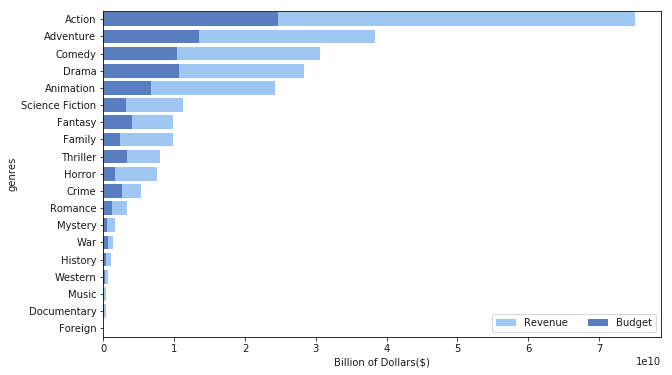

In [10]:
plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(x="revenue", y="genres", data=g3,label="Revenue", color="b")
sns.set_color_codes("muted")
sns.barplot(x="budget", y="genres", data=g3,label="Budget", color="b")
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel("Billion of Dollars($)")
plt.show()

In [11]:

mo = movdat_df.groupby('release_month').sum()
mo = mo.drop(columns=['vote_average', 'roi'])
moroi = pd.DataFrame((mo['revenue']/mo['budget']-1),columns=['roi'])
mo = pd.merge(mo,moroi, how='outer',left_index=True,right_index=True)
mo = mo.reset_index()
mo2 = movdat_df.groupby('release_month').mean()
mo2 = mo2.drop(columns=['budget', 'revenue','award_noms','roi'])
mo2 = mo2.reset_index()
mo3 = pd.merge(mo,mo2)
mo3 = mo3.sort_values(['revenue'], ascending=False)
mo3

,release_month,revenue,budget,award_noms,roi,vote_average
6,June,37458553218,10053027964,20,2.726097,6.260366
2,December,29682127801,9099080528,101,2.262102,6.338624
8,May,27325073348,9387618741,46,1.910757,6.370690
5,July,24704426548,8080515448,32,2.057283,6.220958
9,November,22418144562,7181503469,133,2.121651,6.453049
0,April,21329321356,6582837936,2,2.240141,6.118675
7,March,21226776059,7761220129,8,1.734979,6.186364
10,October,17881531302,6603895033,65,1.707725,6.295327
3,February,15577154469,5556232967,19,1.803546,6.177528
11,September,15265393820,6268147108,59,1.435392,6.244631


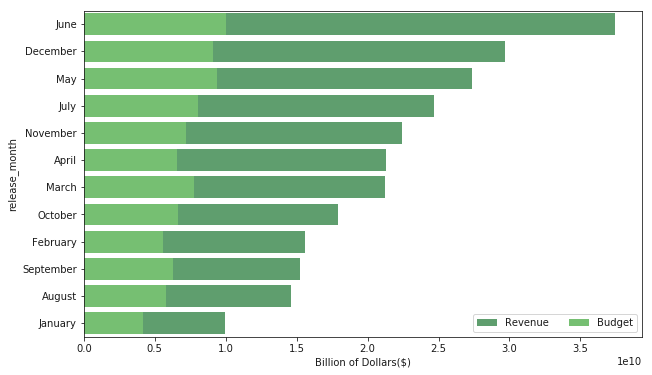

In [12]:

plt.subplots(figsize=(10, 6))
sns.set_color_codes("deep")
sns.barplot(x="revenue", y="release_month", data=mo3,label="Revenue", color="g")
sns.set_color_codes("muted")
sns.barplot(x="budget", y="release_month", data=mo3,label="Budget", color="g")
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel("Billion of Dollars($)")
plt.show()

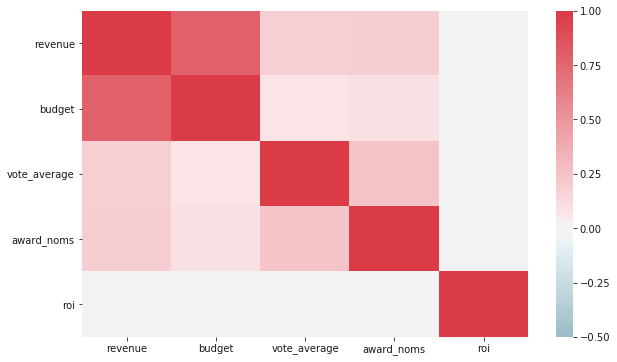

In [13]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10, 6))
sns.heatmap(movdat_df.corr(),cmap=cmap,vmin=-0.5, center=0)

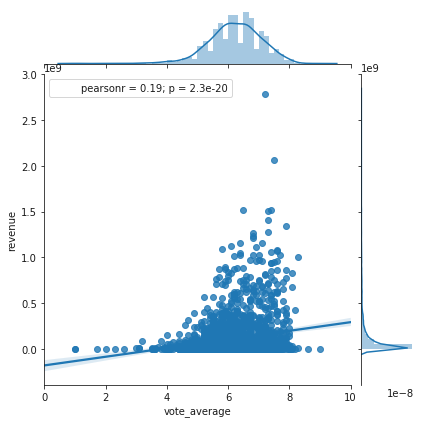

In [14]:
sns.jointplot('vote_average','revenue',data=movdat_df,kind="reg")